In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.pipeline import Pipeline
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Part One

In [4]:
input_data = np.array(df[['Mileage']])
output_data = np.array(df[['Price']])
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print('Price', regr1.coef_, '* Mileage +', regr1.intercept_)

Price [[-0.1725205]] * Mileage + [ 24764.55900606]


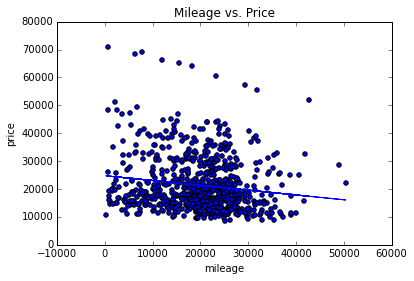

In [5]:
plt.scatter(input_data, output_data)
plt.plot(input_data, regr1.predict(input_data))
plt.ylabel('price')
plt.xlabel('mileage')
plt.title('Mileage vs. Price')
plt.show()

In [6]:
regr1.score(input_data, output_data)



0.020463447323489481

### There is not a strong correlation between mileage and price.

## Part Two

In [13]:
cols=['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
in2=np.array(df[cols])
out2=np.array(df[['Price']])
regr2=linear_model.LinearRegression()
regr2.fit(in2, out2)
print('Price =', end=' ')
for x in range(7):
    print(regr2.coef_[0][x], '*', cols[x],'+', end=' ')
    print(*regr2.intercept_)

Price = -0.169747832333 * Mileage + 6758.7551436
3792.37893078 * Cylinder + 6758.7551436
-787.220731634 * Liter + 6758.7551436
-1542.74584638 * Doors + 6758.7551436
6288.99714985 * Cruise + 6758.7551436
-1993.7952757 * Sound + 6758.7551436
3349.36161961 * Leather + 6758.7551436


In [14]:
regr2.score(in2, out2)

0.4462643536728379

In [18]:
combos = [list(itertools.combinations(cols, sz)) for sz in range(1, 7)]
combos = list(itertools.chain.from_iterable(combos))
dub_combo = [list(x) for x in combos]

In [25]:
regr = [linear_model.LinearRegression() \
         .fit(np.array(df[cols]),np.array(df[['Price']]))
         for cols in combo_combo]
sort_score = sorted(list(zip(combo_combo, regr)),key=lambda x: 
                    x[1].score(np.array(df[x[0]]), 
                               np.array(df[['Price']])), 
                    reverse=True)


In [29]:


for x in sort_score[:]:
    print(str(round(x[1].score(np.array(df[x[0]]), np.array(df[['Price']])), 4))


0.4457
0.4378
0.4369
0.4301
0.43
0.4265
0.4258
0.4248
0.4244
0.4241
0.4225
0.4225
0.4197
0.4191
0.4188
0.4178
0.4165
0.414
0.4107
0.4107
0.4068
0.4065
0.4062
0.4051
0.4046
0.4038
0.4038
0.4035
0.4031
0.4026
0.4024
0.4009
0.4002
0.3965
0.3956
0.3935
0.3935
0.3879
0.3875
0.3873
0.3867
0.3841
0.3839
0.3827
0.3826
0.3822
0.3762
0.3731
0.3714
0.3713
0.368
0.3677
0.3675
0.3653
0.3652
0.3651
0.3633
0.3628
0.3601
0.36
0.3549
0.3547
0.3547
0.3536
0.353
0.3504
0.3503
0.3494
0.3489
0.3483
0.3481
0.346
0.3458
0.3442
0.3435
0.3435
0.3423
0.3411
0.3398
0.3386
0.3385
0.3375
0.337
0.3351
0.3318
0.3313
0.3295
0.3293
0.3291
0.3259
0.3239
0.3234
0.3205
0.3193
0.3115
0.2728
0.2594
0.2567
0.2474
0.2448
0.2346
0.2334
0.2323
0.2239
0.221
0.2172
0.2093
0.2084
0.1996
0.1929
0.1856
0.0893
0.0697
0.0669
0.0626
0.0593
0.048
0.0452
0.0414
0.0404
0.037
0.0369
0.0247
0.0205
0.0193
0.0155


In [30]:
for x in sort_score[:]:
    print(str(round(x[1].score(np.array(df[x[0]]), np.array(df[['Price']])), 4)).ljust(6, '0'), x[0])



0.4457 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4378 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']
0.4369 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather']
0.4301 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']
0.4300 ['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather']
0.4265 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4258 ['Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4248 ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4244 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound']
0.4241 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound']
0.4225 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather']
0.4225 ['Mileage', 'Cylinder', 'Cruise', 'Leather']
0.4197 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise']
0.4191 ['Mileage', 'Cylinder', 'Doors', 'Cruise']
0.4188 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']
0.4178 ['Cylinder', 'Doors', 'Cruise', 'Leather']
0.4165 ['Mileage

## Part 3

In [33]:
df3 = df
for col in df3.columns[2:6]:
    for attr in df3[col].unique():
        df3[attr] = [int(x == attr) for x in df3[col]]
    del df3[col]

In [39]:
regr= [linear_model.LinearRegression() \
       .fit(np.array(df3[[cols]]), np.array(df[['Price']]))
         for cols in df3.columns[1:]]
sortscore= sorted(list(zip(df3.columns[1:], regr)), key=lambda x: 
                    x[1].score(np.array(df3[[x[0]]]), 
                               np.array(df3[['Price']])), reverse=True)


In [41]:
for x in score_sort[:10]:
    print(str(round(x[1].score(np.array(df[[x[0]]]), np.array(df3[['Price']])), 4)).ljust(6, '0'), x[0])

TypeError: unhashable type: 'list'